In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print (x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


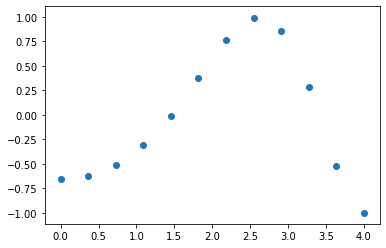

In [2]:
plt.scatter(x, y)
plt.show()



In [3]:
f1 = interpolate.interp1d(x, y,kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'cubic')

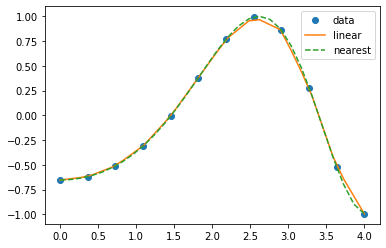

In [4]:
xnew = np.linspace(0, 4, 30)
plt.plot(x, y, "o", xnew, f1(xnew), "-", xnew, f2(xnew), "--")
plt.legend(["data", "linear", "nearest"], loc='best')
plt.show()

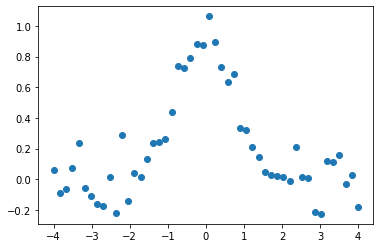

In [5]:
from scipy.interpolate import UnivariateSpline
x = np.linspace(-4, 4, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, "o")
plt.show()

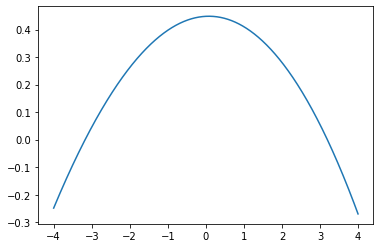

In [6]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-4, 4, 1000)
plt.plot(xs, spl(xs), "-")
plt.show()

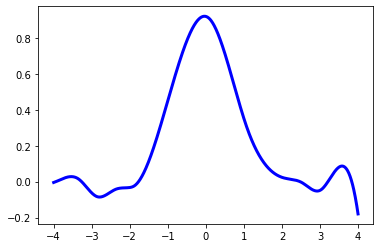

In [7]:
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw = 3)
plt.show()


In [8]:
import scipy.io as sio
vect = np.arange(10)
sio.savemat("array.mat", {"vect": vect})

In [9]:
mat_file = sio.loadmat("array.mat")
print(mat_file)


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Nov 23 19:07:39 2019', '__version__': '1.0', '__globals__': [], 'vect': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


In [10]:
mat_file_content = sio.whosmat("array.mat")
print((mat_file_content))

[('vect', (1, 10), 'int32')]


In [11]:
from scipy import linalg
import numpy as np
a = np.array(
    [
        [1, 3, 5],
        [2, 5, 1],
        [2, 3, 8]
    ]
)
b = np.array([10, 8, 3])
y = linalg.solve(a, b)
print(y)


[-9.28  5.16  0.76]


In [12]:
A = np.array([[1, -1], [1, -1]])
A.shape
x = linalg.det(A)
x

0.0

In [13]:
l, v = linalg.eig(A)
print(l)
print(v)

[3.25176795e-17+1.57009246e-16j 3.25176795e-17-1.57009246e-16j]
[[0.70710678+1.11022302e-16j 0.70710678-1.11022302e-16j]
 [0.70710678+0.00000000e+00j 0.70710678-0.00000000e+00j]]


In [14]:
a = np.random.randn(3, 2) + 1*np.random.randn(3, 2)
u, s, v = linalg.svd(a)
print(u, s, v)

[[-0.55701831  0.8098411  -0.18408692]
 [-0.72806473 -0.58281023 -0.36090718]
 [-0.39956521 -0.06700472  0.91425271]] [3.30543375 1.17716563] [[ 0.97960802 -0.20091819]
 [-0.20091819 -0.97960802]]


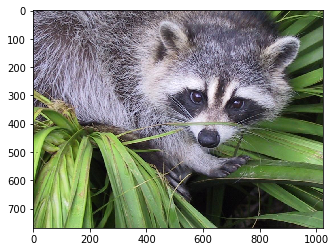

In [15]:
from scipy import misc
import imageio
f = misc.face()
imageio.imwrite("face.png", f)
plt.imshow(f)
plt.show()

In [16]:
face = misc.face(gray=False)
print(face.mean(), face.max(), face.min())

110.16274388631184 255 0


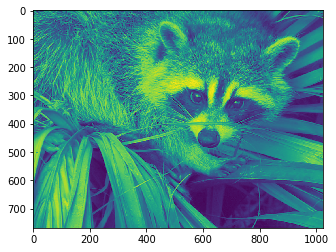

In [17]:
f = misc.face()
imageio.imwrite("face.png", f)
face = misc.face(gray=True)
lx, ly = face.shape
crop_face = face[-int(lx) : int(lx), -int(ly) : int(ly)]
plt.imshow(crop_face)
plt.show()

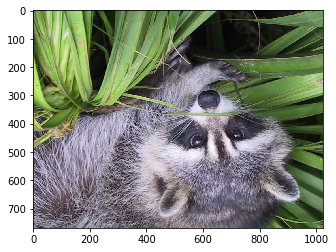

In [18]:
face = misc.face()
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)
plt.show()

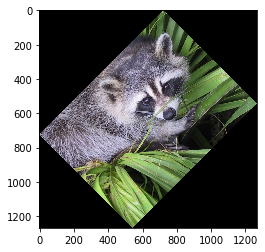

In [19]:
from scipy import ndimage
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)
plt.show()

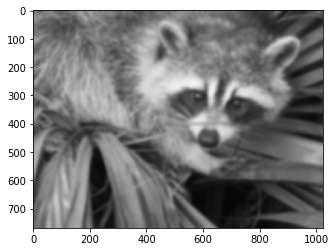

In [20]:
face = misc.face()
blurred_face = ndimage.gaussian_filter(face, sigma=5)
plt.imshow(blurred_face)
plt.show()

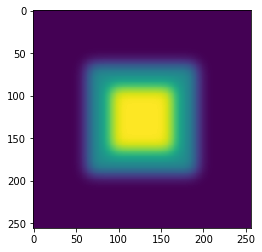

In [21]:
im = np.zeros((256, 256))
im[64 : -64, 64 : -64] = 1
im[90 : -90, 90 : -90] = 2
im = ndimage.gaussian_filter(im, 8)

plt.imshow(im)
plt.show()

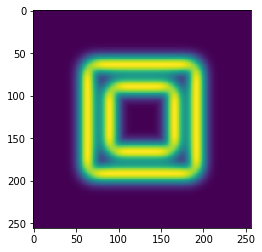

In [22]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode="constant")
sob = np.hypot(sx, sy)
plt.imshow(sob)
plt.show()

In [23]:
from scipy.optimize import least_squares
def fun(x):
    return np.array([10 * (x[1] - x[0] ** 2), (1 - x[0])])
input = np.array([2, 2])
res = least_squares(fun, input)

print(res)

 active_mask: array([0., 0.])
        cost: 9.866924291084687e-30
         fun: array([4.44089210e-15, 1.11022302e-16])
        grad: array([-8.89288649e-14,  4.44089210e-14])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 8.892886493421953e-14
      status: 1
     success: True
           x: array([1., 1.])


In [24]:
from scipy.optimize import root
def func(x):
    return x**2 + 2 * np.cos(x)
sol = root(func, 0.5)
print(sol)

    fjac: array([[1.]])
     fun: array([2.])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last five Jacobian evaluations.'
    nfev: 23
     qtf: array([2.])
       r: array([-0.])
  status: 4
 success: False
       x: array([-0.0047079])


In [25]:
from scipy.stats import norm
cdfarr = norm.cdf(np.array([1, -1, 0, 1, 3, 4, -2, 6]))
print(cdfarr)



[0.84134475 0.15865525 0.5        0.84134475 0.9986501  0.99996833
 0.02275013 1.        ]


In [26]:
ppfvar = norm.ppf(0.5)
print(ppfvar)


0.0


In [27]:
rvsvar = norm.rvs(size = 5)
print(rvsvar)

[ 1.00769296 -1.20756557 -0.76029851  1.31857829 -0.76163346]


In [28]:
from scipy.stats import uniform
cvar = uniform.cdf([0, 1, 2, 3, 4, 5], loc = 1, scale = 4)
print(cvar)


[0.   0.   0.25 0.5  0.75 1.  ]


In [29]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x.min(), x.max(), x.mean(), x.var())


1 9 5.0 6.666666666666667


In [31]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
sta = stats.ttest_1samp(rvs,5.0)
print(sta)

Ttest_1sampResult(statistic=array([-0.35531593,  1.73233301]), pvalue=array([0.72387791, 0.08950531]))


In [ ]:
A = np.array([
    [0, 2, 1], 
    [2, 0, 0],
    [1, 0, 0]
])
